Reading and Understanding Data


In [3]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [8]:
df = pd.read_csv('AutoData (1).csv', encoding='unicode_escape')
df


,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Inspection

In [15]:
df.shape


(205, 25)

In [16]:
df.describe

<bound method NDFrame.describe of      symboling                      make fueltype  ... citympg highwaympg    price
0            3        alfa-romero giulia      gas  ...      21         27  13495.0
1            3       alfa-romero stelvio      gas  ...      21         27  16500.0
2            1  alfa-romero Quadrifoglio      gas  ...      19         26  16500.0
3            2               audi 100 ls      gas  ...      24         30  13950.0
4            2                audi 100ls      gas  ...      18         22  17450.0
..         ...                       ...      ...  ...     ...        ...      ...
200         -1           volvo 145e (sw)      gas  ...      23         28  16845.0
201         -1               volvo 144ea      gas  ...      19         25  19045.0
202         -1               volvo 244dl      gas  ...      18         23  21485.0
203         -1                 volvo 246   diesel  ...      26         27  22470.0
204         -1               volvo 264gl      gas  ..

In [17]:
df.columns


Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

DATA CLEANING

In [19]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

symboling           0.0
make                0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Exploratory Data Analysis ( EDA )

In [ ]:
#Univariate Analysis

Price : Target Variable

In [20]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

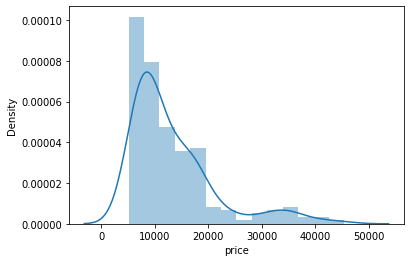

In [21]:
sns.distplot(df['price'])

In [23]:
#Car ID
# car_ID : Unique ID for each observation

Symboling

In [ ]:
# symboling : Its assigned insurance risk rating
#             A value of +3 indicates that the auto is risky,
#             -3 that it is probably pretty safe.(Categorical)

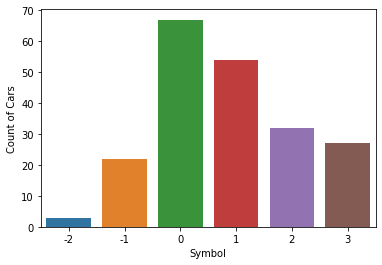

<Figure size 432x288 with 0 Axes>

In [24]:
plt1 = sns.countplot(df['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

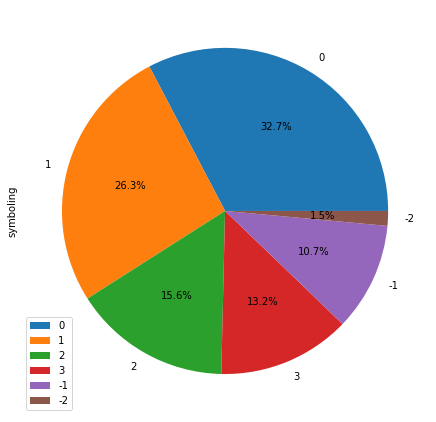

<Figure size 432x288 with 0 Axes>

In [25]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

Let's see average price of cars in each symbol category.

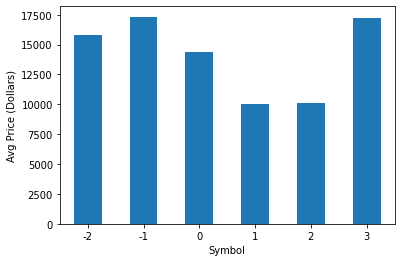

In [26]:
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

Fuel Type


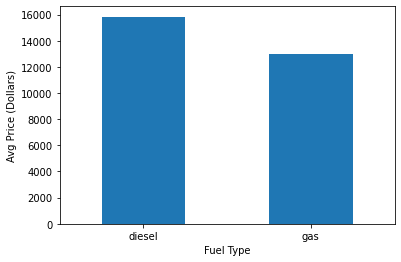

In [28]:
df_fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

Aspirations

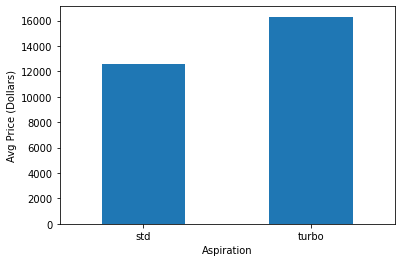

In [29]:
df_aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

Door Numbers

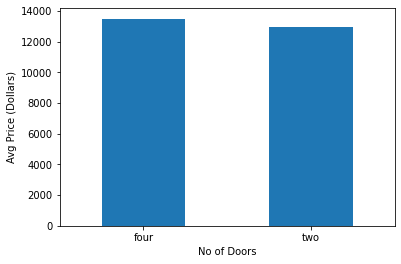

In [30]:
df_door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

Car Body

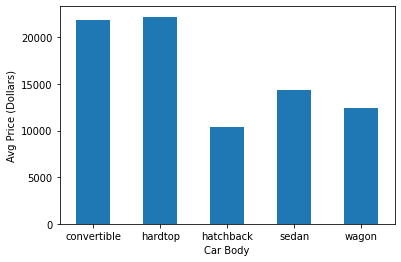

In [31]:
df_body_avg_price = df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

DriveWheel

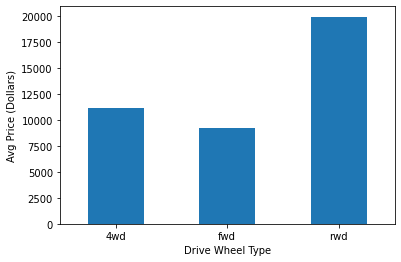

In [32]:
df_drivewheel_avg_price = df[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


Wheel Base

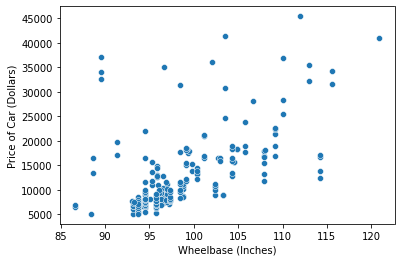

In [33]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [ ]:
# Most cars has a wheel base around 95 inches.
# Price has a slight positive correlation with wheelbase.

Car Dimentions

In [ ]:
## Let's see how price varies with Car's length, width,height and weight.

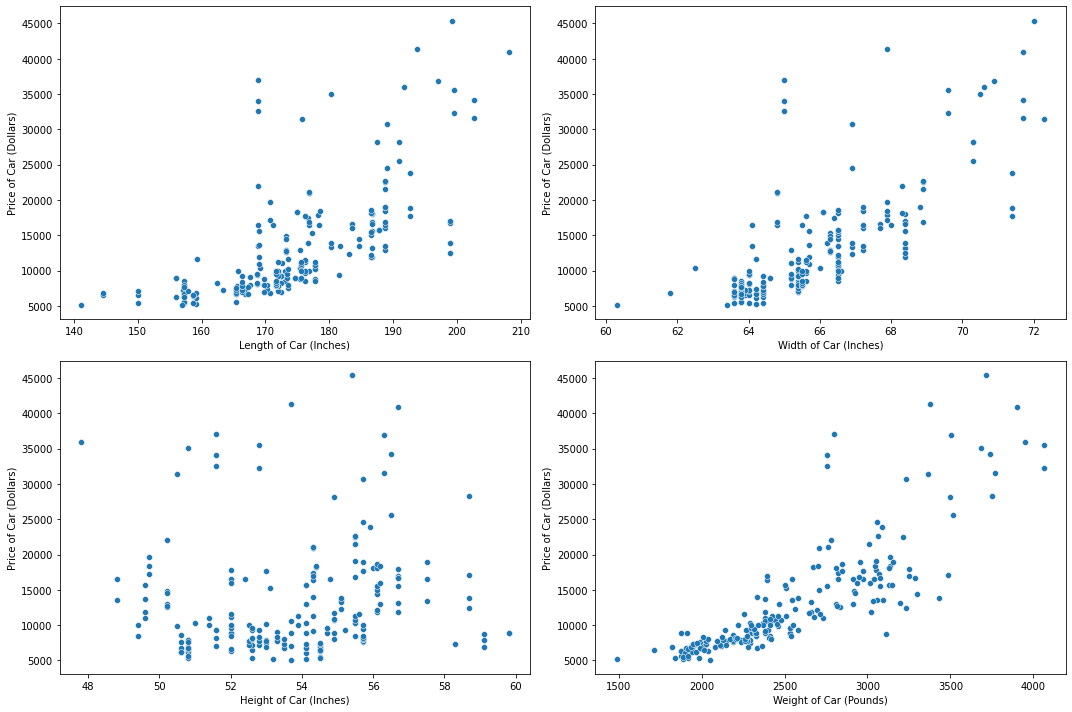

In [34]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

Engine Specifications

Engine Type, Cylinder, Fuel System


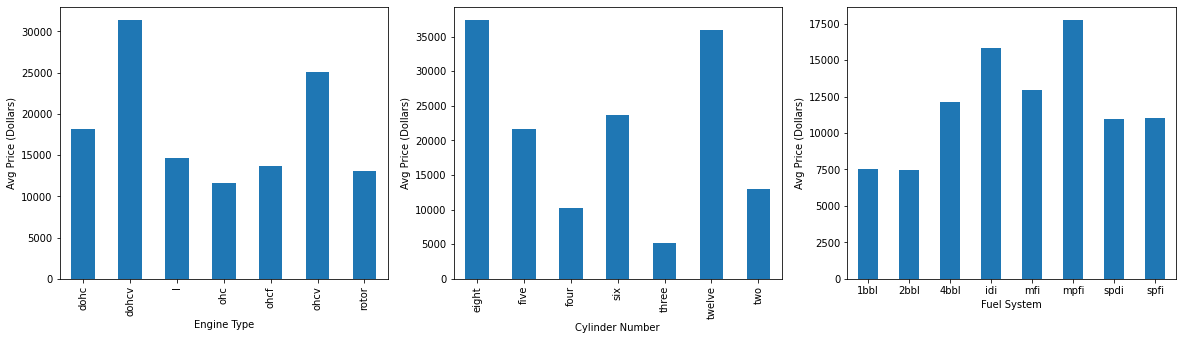

In [35]:

fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio


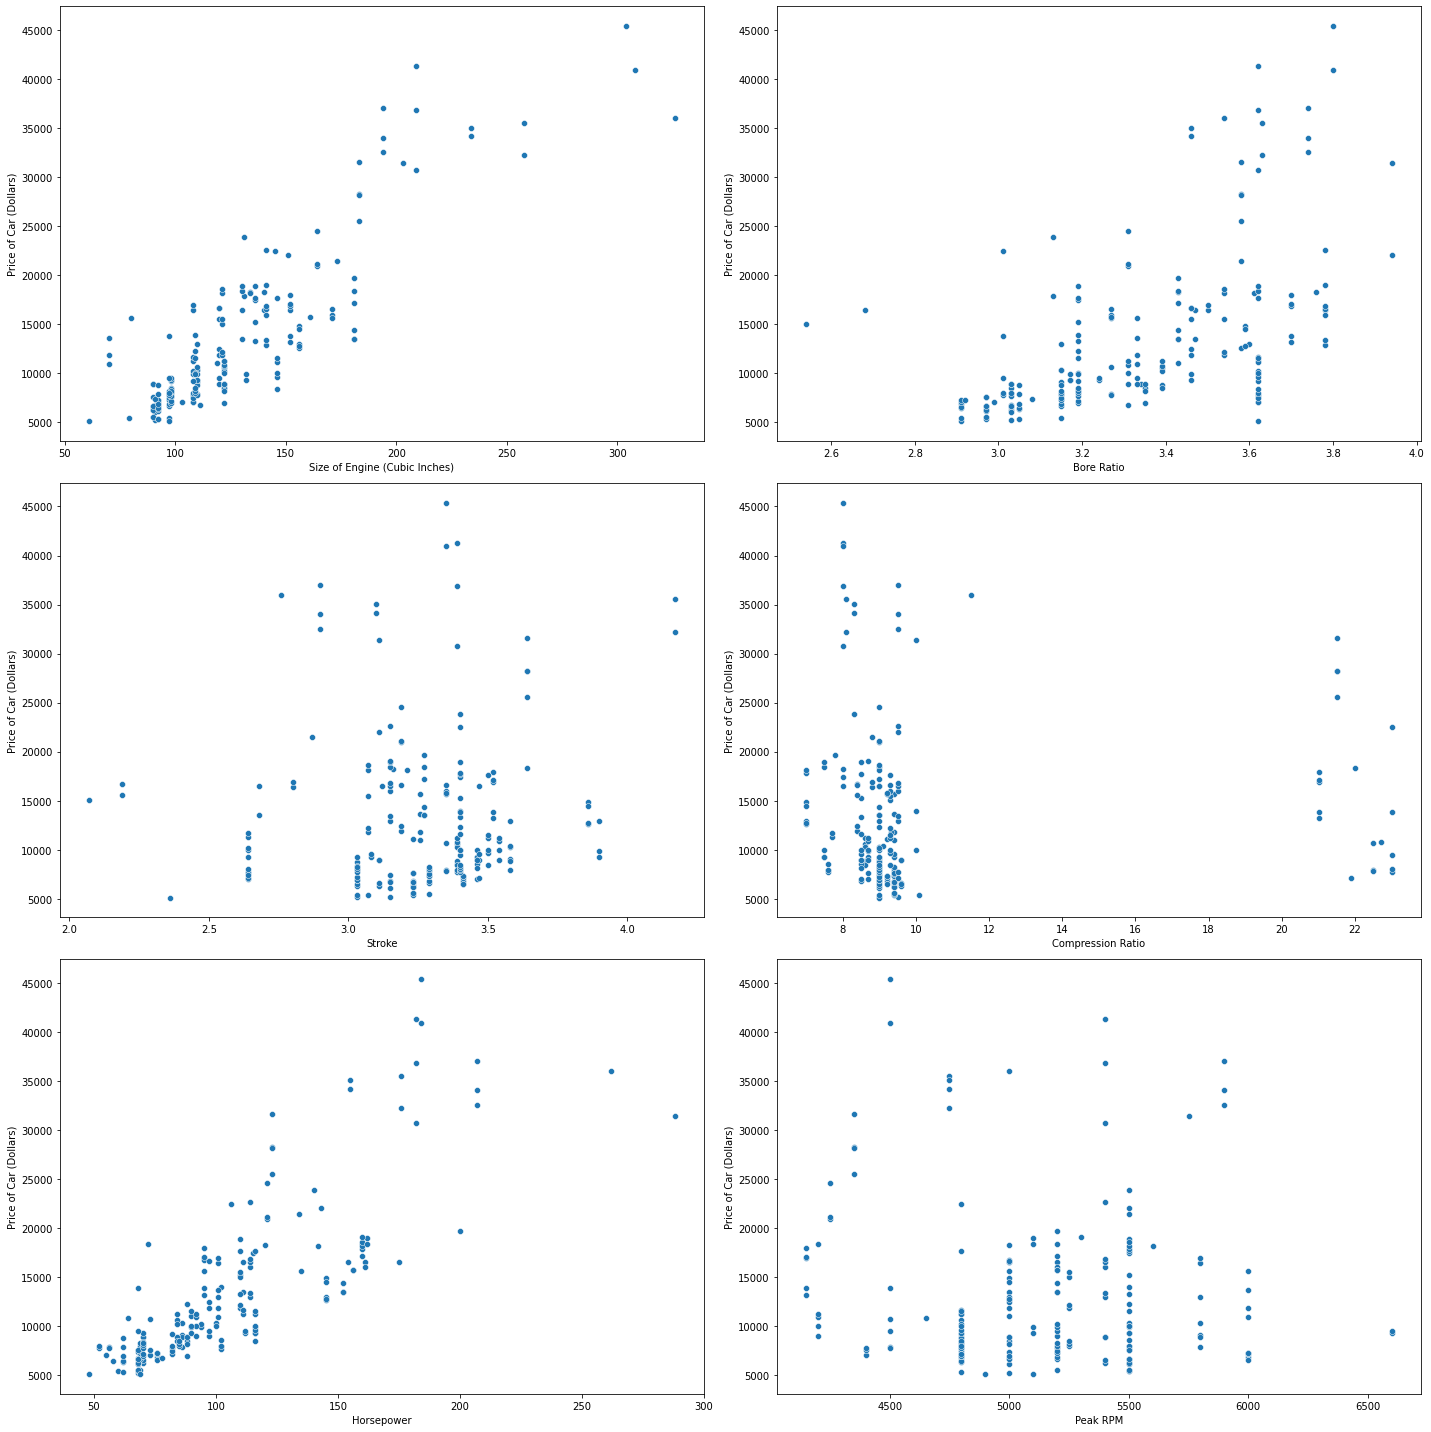

In [36]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()


City Mileage & Highway Mileage


In [ ]:
# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.

In [37]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45


In [ ]:
# Let's see how price varies with mileage.


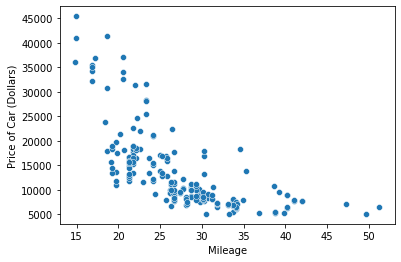

In [38]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Bivariate Analysis


Brand Category - Horsepower



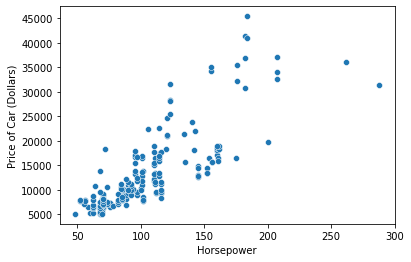

In [41]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price',  data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Mileage - Fuel Type


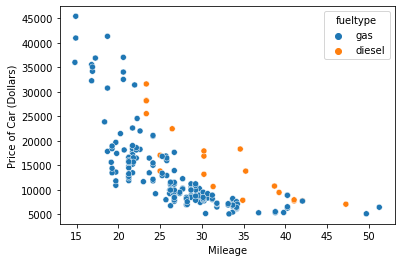

In [42]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Horsepower - Fuel Type


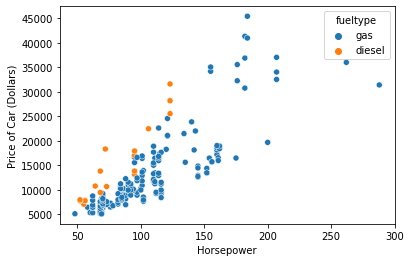

In [43]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()